In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip /content/drive/MyDrive/Cutout_Files.zip

Archive:  /content/drive/MyDrive/Cutout_Files.zip
   creating: Cutout Files/
   creating: Cutout Files/galaxy/
  inflating: Cutout Files/galaxy/IC3521-H01_1260_751_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1300_759_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1326_1169_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1361_946_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1399_1031_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1449_1243_3.jpg  
  inflating: Cutout Files/galaxy/IC3521-H01_1536_1206_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1014_1208_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1195_791_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1372_890_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1519_1266_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_1821_1270_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_412_1000_3.jpg  
  inflating: Cutout Files/galaxy/IC745_H01_683_1551_3.jpg  
  inflating: Cutout Files/galaxy/IC

In [4]:
import cv2
import numpy as np
import glob
data = []
labels = []

galaxy_path = glob.glob('/content/Cutout Files/galaxy/*')
star_path = glob.glob('/content/Cutout Files/star/*')

# galaxy images: label 0
i = 0
for x in galaxy_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    labels.append(0)

# star images: label 1
for x in star_path:
    image = cv2.imread(x, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(image)
    labels.append(1)

data = np.array(data)/255
labels = np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.8, random_state=42)

In [6]:
train_data.shape

(797, 64, 64)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the data for KNN (assuming each image is flattened)
train_data_flatten = train_data.reshape(train_data.shape[0], -1)
test_data_flatten = test_data.reshape(test_data.shape[0], -1)




In [8]:
k=np.arange(1,10,2)

Knn=[]
for i in k:
  knn_classifier = KNeighborsClassifier(n_neighbors=i)

  Knn.append(knn_classifier)


In [9]:
accuracy=[]
for i in range(len(Knn)):
  Knn[i].fit(train_data_flatten, train_labels)

  y_pred_test= Knn[i].predict(test_data_flatten)
  accuracy_test= accuracy_score(test_labels, y_pred_test)
  accuracy.append(accuracy_test)
  print(f'')
  print(f'for K= {k[i]} and Acuuracy is {accuracy_test} \n')


for K= 1 and Acuuracy is 0.7146440890561304 


for K= 3 and Acuuracy is 0.7469426152398871 


for K= 5 and Acuuracy is 0.7591721542803387 


for K= 7 and Acuuracy is 0.7601128880526811 


for K= 9 and Acuuracy is 0.7591721542803387 



In [10]:
A={}
for j in range(len(k)):
    key= k[j]
    value=accuracy[j]
    A[key]=value

Key= max(A, key = A.get)

#------------------------------- BEST K-value--------------------------------------
print(f'K={Key} gives the best accuracy in the model')


K=7 gives the best accuracy in the model


Text(0, 0.5, 'Accuracy')

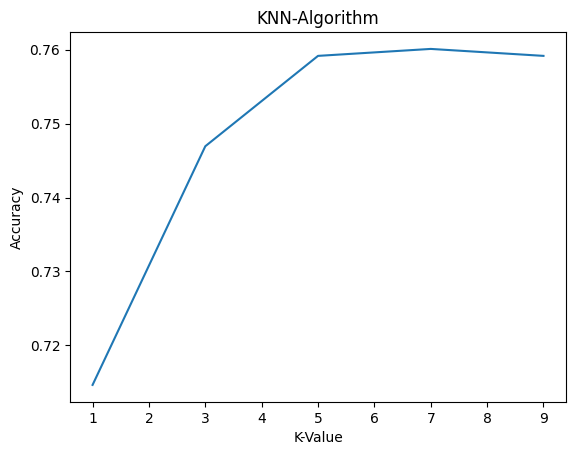

In [11]:
#---------------------- PLOTTING ALL K-Value V/S Accuracy---------------------------------
import matplotlib.pyplot as plt
plt.plot(k,accuracy)
plt.title("KNN-Algorithm")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

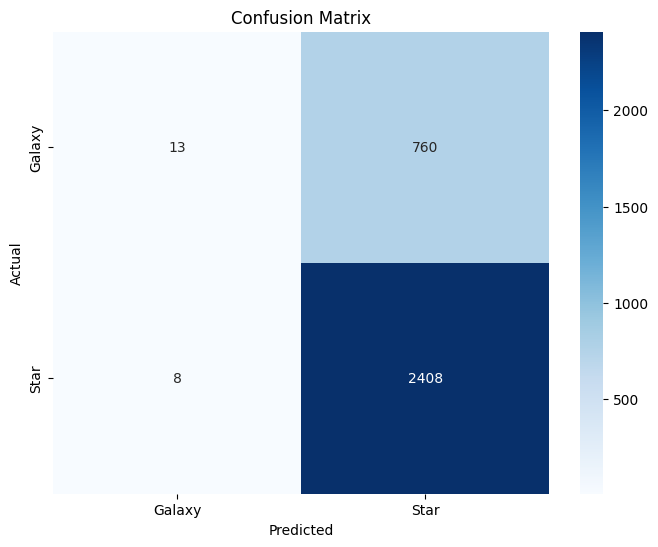

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(test_labels, y_pred_test)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Galaxy', 'Star'], yticklabels=['Galaxy', 'Star'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
TP = 13
TN = 612
FP = 164
FN = 8

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.07344632768361582
Recall: 0.6190476190476191
F1 Score: 0.13131313131313133
